In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spec_utils import read_irs

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


In [4]:
irs=read_irs('TWCHA',dd='/Users/annadignan/REDUCED/',noerror=True)

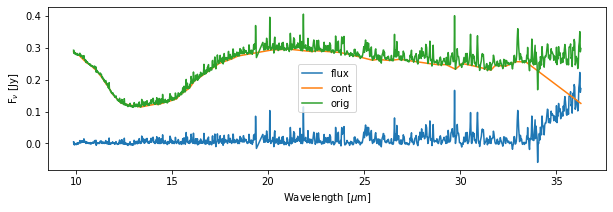

In [5]:
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(irs.wave,irs.flux,label='flux')
ax1.plot(irs.wave,irs.cont,label='cont')
ax1.plot(irs.wave,irs.orig,label='orig')
ax1.set_ylabel(r'F$_\nu$ [Jy]')
ax1.set_xlabel('Wavelength [$\mu$m]')
ax1.legend()

In [6]:
wave_data = pd.DataFrame([15.17], columns=['wave'])
print(wave_data)

    wave
0  15.17


/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


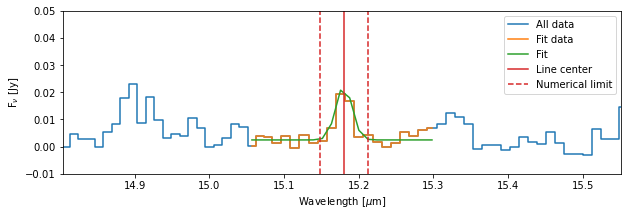

Is this fit okay? [y or n]y


In [7]:
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.02)

In [8]:
lineflux_data

,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
0,15.17,6.038842e-18,7.007569e-18,7.312892e-19,499.666658,inf,200.0,inf,0.002461,inf
